In [1]:
import os, glob, re, pickle
from functools import partial
from collections import OrderedDict
import operator as op
from cytoolz import compose

import pandas as pd
import seaborn as sns
import numpy as np
import scanpy as sc
import anndata as ad
import matplotlib as mpl
import matplotlib.pyplot as plt

from pyscenic.export import export2loom, add_scenic_metadata
from pyscenic.utils import load_motifs
from pyscenic.transform import df2regulons
from pyscenic.aucell import aucell
from pyscenic.binarization import binarize
from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_binarization, plot_rss

from IPython.display import HTML, display

/home/xll/miniconda3/envs/jupyter_notebook/lib/python3.10/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/xll/miniconda3/envs/jupyter_notebook/lib/python3.10/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> i

In [3]:
rss = pd.read_excel("/home/xll/HIE/联合分析/scores.xlsx", index_col=0)
rss

,Ccl4,Cd14,Spp1,Cd63,Lilrb4a,Ctsb,Id2,Lgals3,Ccl3,Cd9,...,Zmpste24,Ntpcr,Wapl,Atraid,Ccdc50,Rhog,Ophn1,Fnbp1,Tmem173,Gnl3
Frequence,4.000000,4.000000,4.000000,4.000000,4.000000,4.0000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
Total score,17.723563,15.862728,14.408531,14.295107,14.126826,14.0854,13.124124,13.098836,12.861586,12.498068,...,0.003115,0.002475,0.002441,0.002441,0.002326,0.00171,0.001624,0.001496,0.001407,0.000821


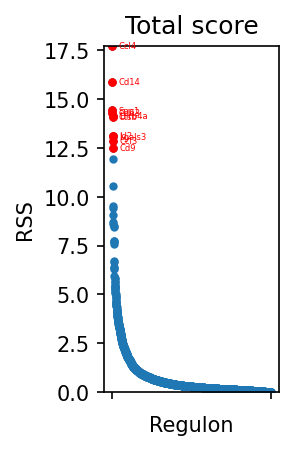

In [5]:
#sns.set(style='whitegrid', font_scale=0.8)
fig, ax = plt.subplots(figsize=(1.5, 3), dpi=150)  # 创建一个matplotlib图形和轴对象
plot_rss(rss, cell_type='Total score', top_n=10, ax=ax)
#plt.savefig('/home/xll/HIE/联合分析/Regulon(rat).pdf', format='pdf', bbox_inches='tight')
plt.show()


In [6]:
rss = pd.read_excel("/home/xll/HIE/联合分析/scores2.xlsx", index_col=0)
rss

,Myo1e,Spp1,Rbpj,Abr,Igf1,Dhrs9,Nav3,Csf1,Lrp1,Tns3,...,Cass4,Kif26b,AABR07039446.2,Samd4a,Parvb,Rasal2,Plau,Plaur,Itgb3,Ccl2
Gene,,,,,,,,,,,,,,,,,,,,,
Frequence,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Total score,4.161502,3.636748,2.47199,2.442617,2.224076,1.869155,1.819747,1.756573,1.731,1.728224,...,0.561974,0.554274,0.547575,0.541643,0.537672,0.531222,0.409739,0.286705,0.201868,0.052259


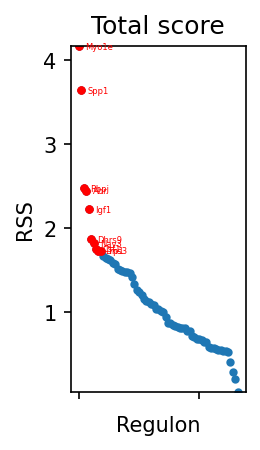

In [8]:
#sns.set(style='whitegrid', font_scale=0.8)
fig, ax = plt.subplots(figsize=(1.5, 3), dpi=150)  # 创建一个matplotlib图形和轴对象
plot_rss(rss, cell_type='Total score', top_n=10, ax=ax)
#plt.savefig('/home/xll/HIE/联合分析/Regulon(rat).pdf', format='pdf', bbox_inches='tight')
plt.show()
